In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [3]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [4]:
df["id"]=df["id"].astype(str)
df["host_id"]=df["host_id"].astype(str)
df["latitude"]=df["latitude"].astype(str)
df["longitude"]=df["longitude"].astype(str)

In [5]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.nunique()

id                                38821
name                              38244
host_id                           30232
host_name                          9885
neighbourhood_group                   5
neighbourhood                       218
latitude                          17436
longitude                         13639
room_type                             3
price                               581
minimum_nights                       89
number_of_reviews                   393
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

# Univariate Analysis Non Graphical 

## Categorical 

In [7]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64

In [8]:
# percentage 

df['neighbourhood_group'].value_counts(normalize=True)


neighbourhood_group
Manhattan        0.428145
Brooklyn         0.423456
Queens           0.117771
Bronx            0.022539
Staten Island    0.008088
Name: proportion, dtype: float64

In [9]:
df['room_type'].value_counts()

room_type
Entire home/apt    20321
Private room       17654
Shared room          846
Name: count, dtype: int64

In [10]:
df['room_type'].value_counts(normalize=True)


room_type
Entire home/apt    0.523454
Private room       0.454754
Shared room        0.021792
Name: proportion, dtype: float64

In [11]:
df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
Holliswood               2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: count, Length: 218, dtype: int64

In [12]:
df['neighbourhood'].value_counts(normalize=True)


neighbourhood
Williamsburg          0.081477
Bedford-Stuyvesant    0.080910
Harlem                0.056773
Bushwick              0.050024
Hell's Kitchen        0.039360
                        ...   
Holliswood            0.000052
New Dorp Beach        0.000052
Richmondtown          0.000026
Rossville             0.000026
Willowbrook           0.000026
Name: proportion, Length: 218, dtype: float64

In [13]:
df_n = df['neighbourhood'].value_counts().reset_index()

In [14]:
df_n

,neighbourhood,count
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
...,...,...
213,Holliswood,2
214,New Dorp Beach,2
215,Richmondtown,1
216,Rossville,1


In [15]:
df_n[df_n['count']>1000]

,neighbourhood,count
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265


## Numerical

In [16]:
# bins is use to divide the range to analysis 

df['price'].value_counts(bins=5)

(-10.001, 2000.0]    38786
(2000.0, 4000.0]        20
(4000.0, 6000.0]         8
(8000.0, 10000.0]        5
(6000.0, 8000.0]         2
Name: count, dtype: int64

'customise the bins' 

In [17]:
# define the ranges 

bins = (0,50,100,200,500,2000,10000)

In [18]:
df['price'].value_counts(bins=bins)


(50.0, 100.0]        14212
(100.0, 200.0]       13544
(200.0, 500.0]        5267
(-0.001, 50.0]        5176
(500.0, 2000.0]        587
(2000.0, 10000.0]       35
Name: count, dtype: int64

In [19]:
df['price'].mean()

142.33252621004095

In [20]:
df['price'].std()


196.99475591833985

In [21]:
df['price'].skew()


23.673594295123014

In [22]:
df['price'].kurt()


953.4807356344944

# Univariate Analysis Graphical 


In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Categorical

#### Bar Graph

<Axes: xlabel='room_type', ylabel='count'>

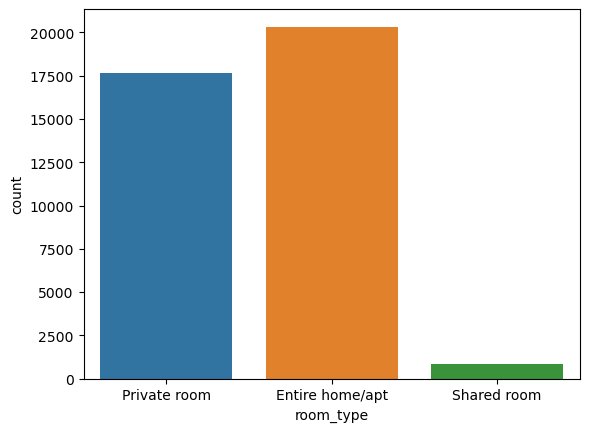

In [24]:
sns.countplot( x=df["room_type"])

<Axes: xlabel='neighbourhood_group', ylabel='count'>

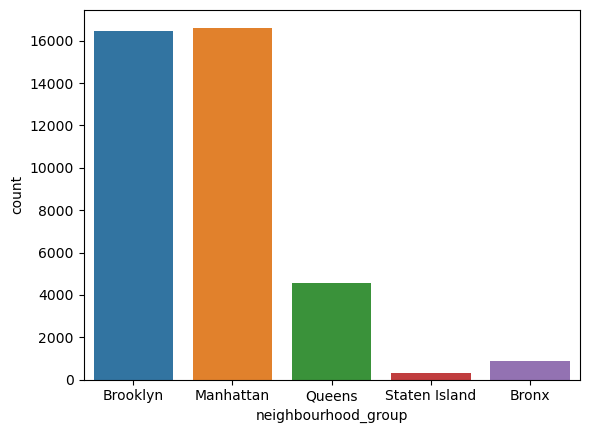

In [25]:
sns.countplot(data=df, x= "neighbourhood_group")

<Axes: xlabel='neighbourhood_group', ylabel='count'>

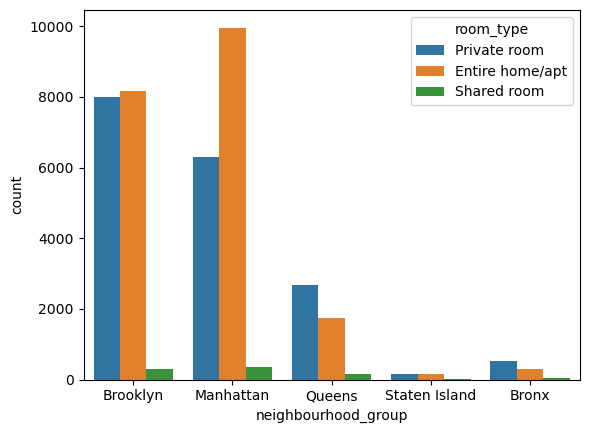

In [26]:
sns.countplot(data = df, x ="neighbourhood_group" , hue = "room_type")

### Pie Chart

<Axes: ylabel='count'>

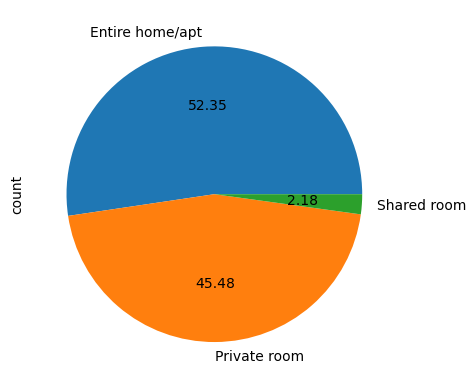

In [27]:
df["room_type"].value_counts().plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='availability_365'>

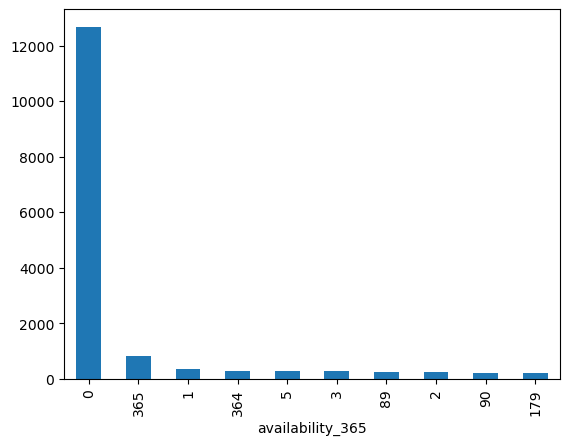

In [28]:
df["availability_365"].value_counts().head(10).plot(kind ="bar")

In [29]:
df2 = sns.load_dataset("titanic")

In [30]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='survived', ylabel='count'>

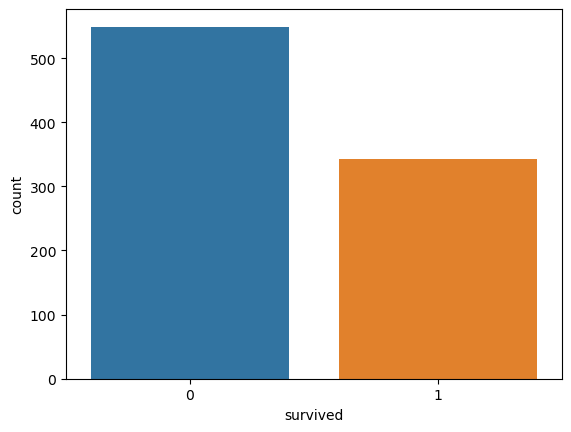

In [31]:
sns.countplot(x = df2["survived"])

<Axes: xlabel='embark_town', ylabel='count'>

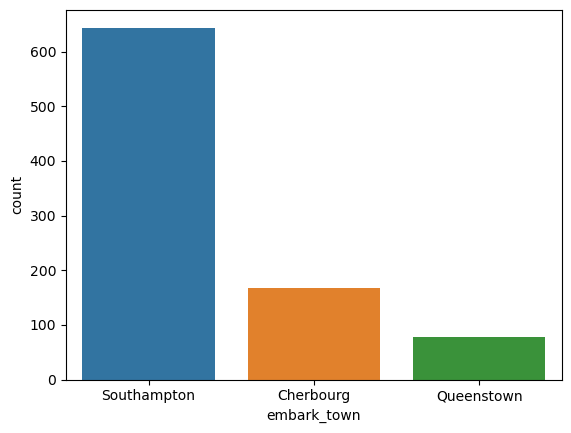

In [32]:
sns.countplot(x = df2["embark_town"])

<Axes: ylabel='count'>

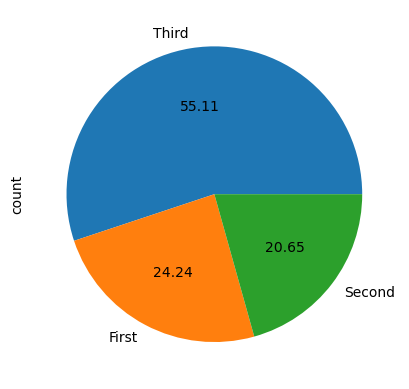

In [33]:
df2["class"].value_counts().plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='alone', ylabel='count'>

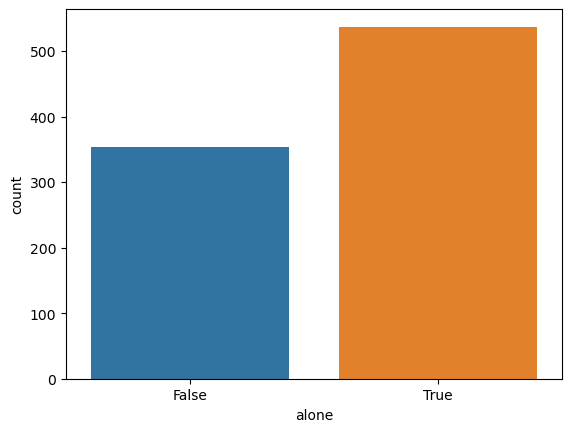

In [34]:
sns.countplot(x = df2["alone"])

# Univariate Analysis ( Numerical )

In [35]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [36]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


### Histogram

c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

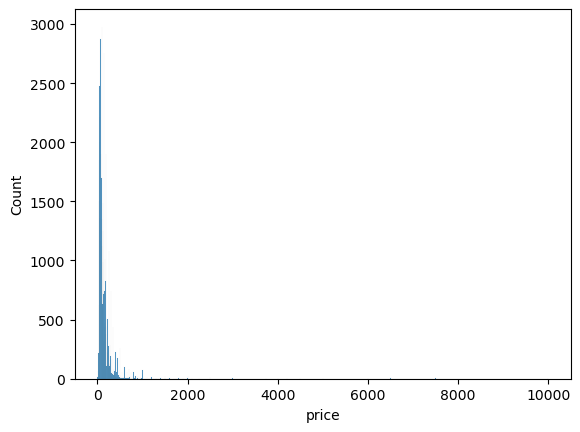

In [40]:
sns.histplot(data = df,x = 'price')


c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

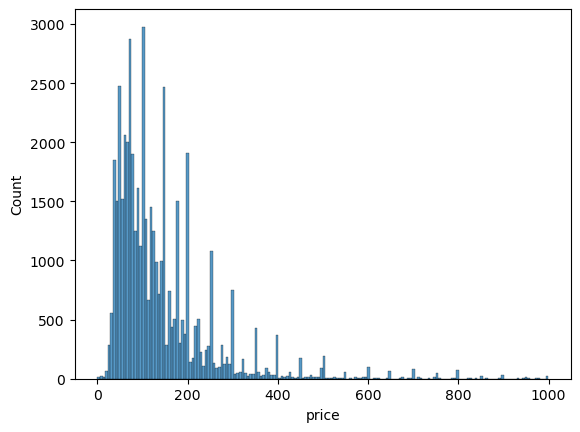

In [39]:
sns.histplot(data = df[df['price']<1000],x = 'price')

c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='availability_365', ylabel='Count'>

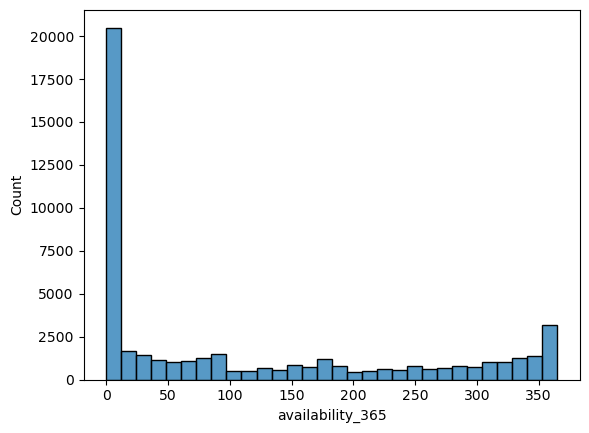

In [41]:
sns.histplot(data = df,x = 'availability_365')


### Distplot

C:\Users\gupta\AppData\Local\Temp\ipykernel_12068\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

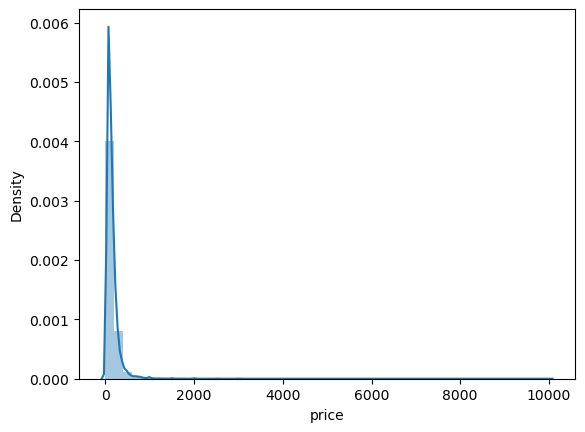

In [43]:
sns.distplot(df['price'])

C:\Users\gupta\AppData\Local\Temp\ipykernel_12068\1085274206.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['availability_365'])
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='availability_365', ylabel='Density'>

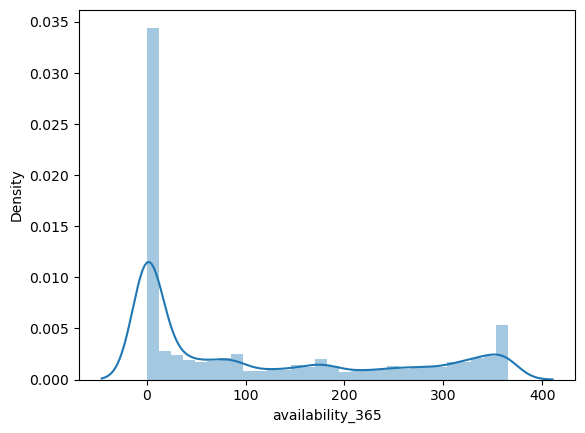

In [44]:
sns.distplot(df['availability_365'])


C:\Users\gupta\AppData\Local\Temp\ipykernel_12068\1518725893.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reviews_per_month'])
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='reviews_per_month', ylabel='Density'>

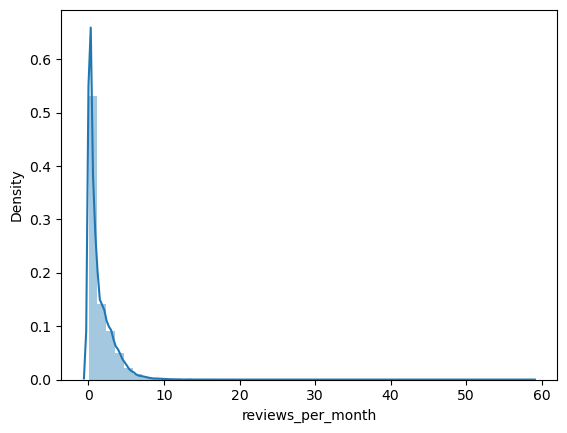

In [45]:
sns.distplot(df['reviews_per_month'])


### Boxplot

<Axes: >

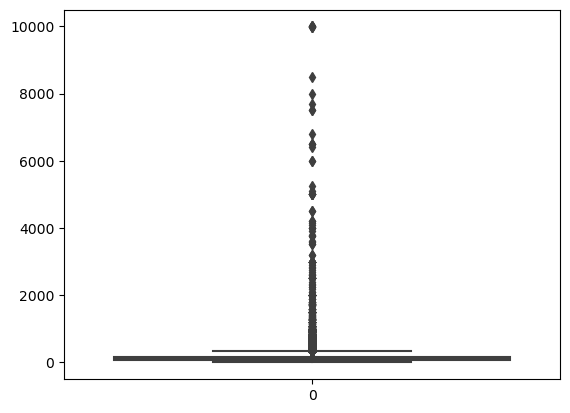

In [46]:
sns.boxplot(df['price'])

### Voilinplot

<Axes: >

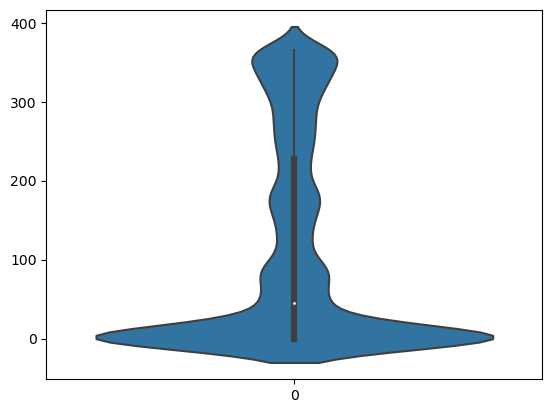

In [49]:
sns.violinplot(df['availability_365'])

# Bivariate Analysis (Numerical-categorical)

In [50]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [51]:
df = sns.load_dataset("Titanic")

In [52]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='fare'>

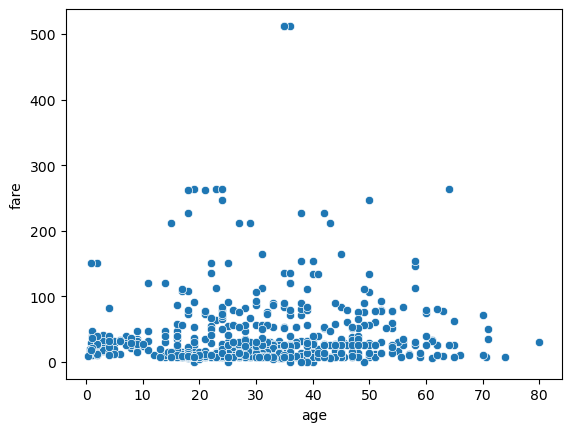

In [53]:
sns.scatterplot(x="age", y = "fare", data = df)

<Axes: xlabel='class', ylabel='age'>

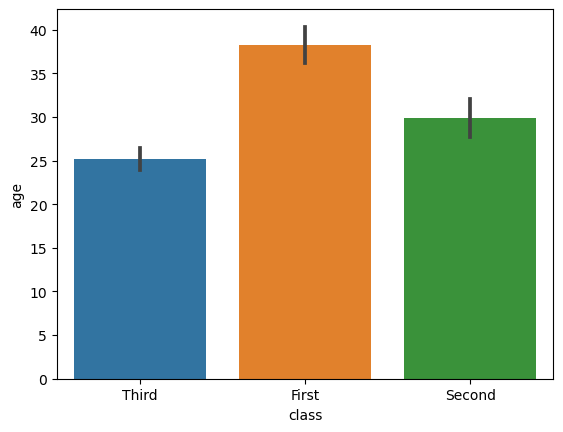

In [54]:
sns.barplot(x='class',y = 'age',data=df)

<Axes: xlabel='class', ylabel='age'>

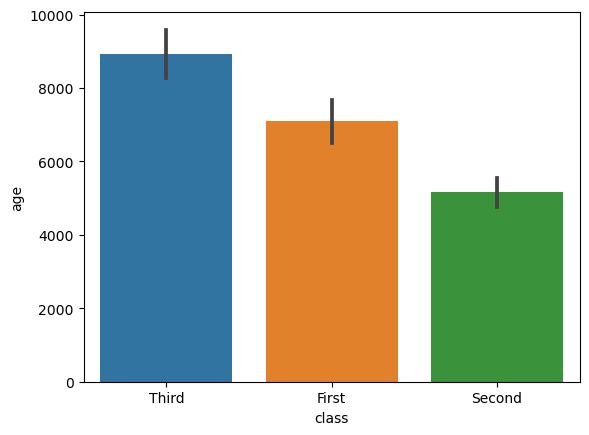

In [56]:
sns.barplot(x='class',y = 'age',data=df,estimator='sum')


<Axes: xlabel='class', ylabel='fare'>

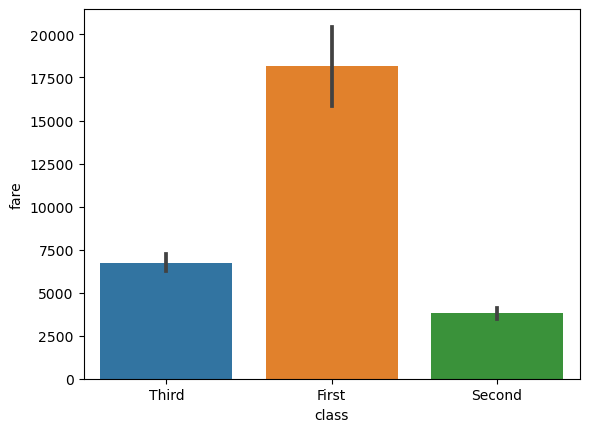

In [57]:
sns.barplot(x='class',y = 'fare',data=df,estimator='sum')


<Axes: xlabel='class', ylabel='age'>

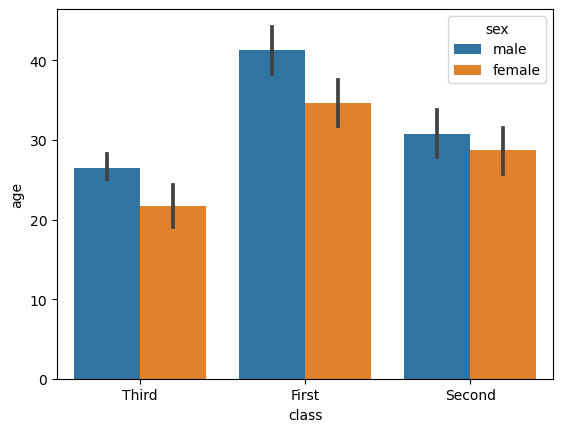

In [58]:
sns.barplot(x='class',y = 'age',hue='sex',data=df)


<Axes: xlabel='class', ylabel='age'>

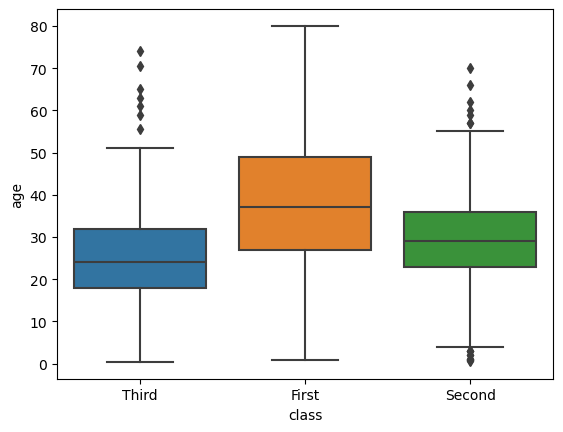

In [59]:
sns.boxplot(x='class',y = 'age',data=df)


<Axes: xlabel='class', ylabel='age'>

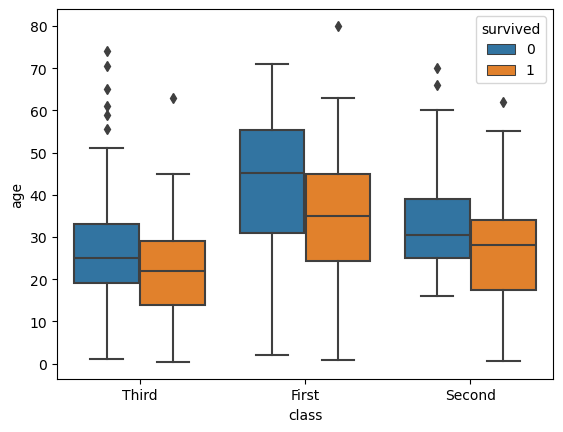

In [63]:
sns.boxplot(x='class',y = 'age',hue='survived',data=df)


<Axes: xlabel='class', ylabel='age'>

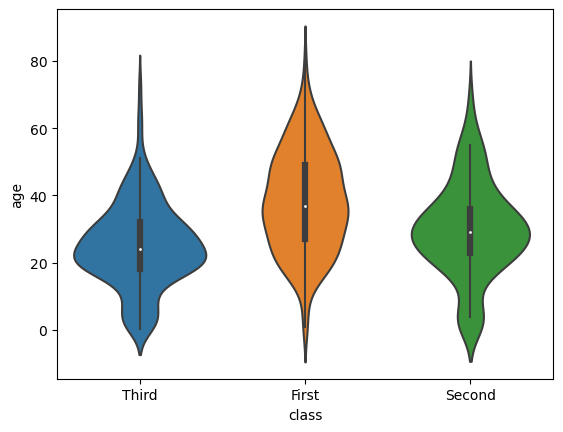

In [64]:
sns.violinplot(x='class',y = 'age',data=df)


# Bivariate Visualization(Categorical)

In [67]:
import pandas as pd
import seaborn as sns

In [68]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


AttributeError: 'numpy.int64' object has no attribute 'startswith'

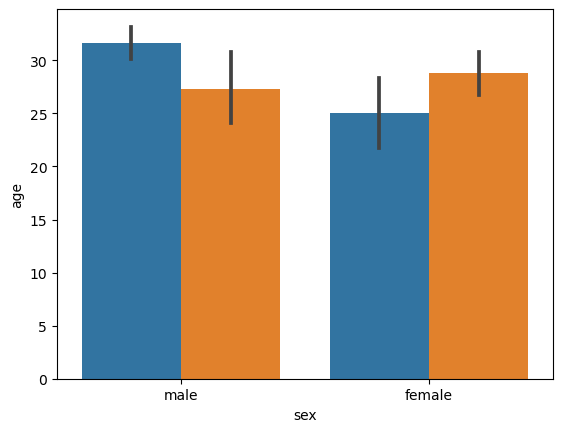

In [69]:
sns.barplot(x = "sex", y= "age",hue = "survived" ,data = df)

<Axes: xlabel='survived', ylabel='count'>

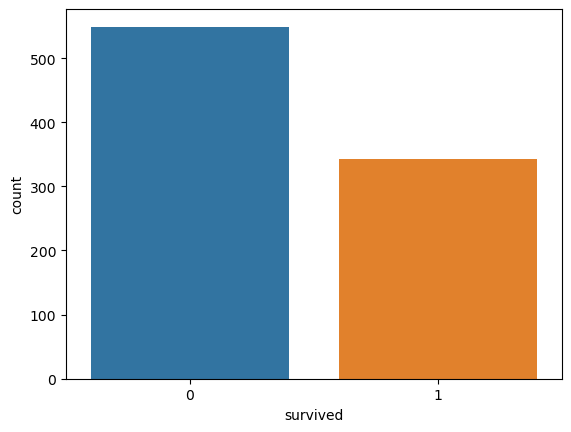

In [70]:
sns.countplot(x='survived',data=df)

<Axes: xlabel='survived', ylabel='count'>

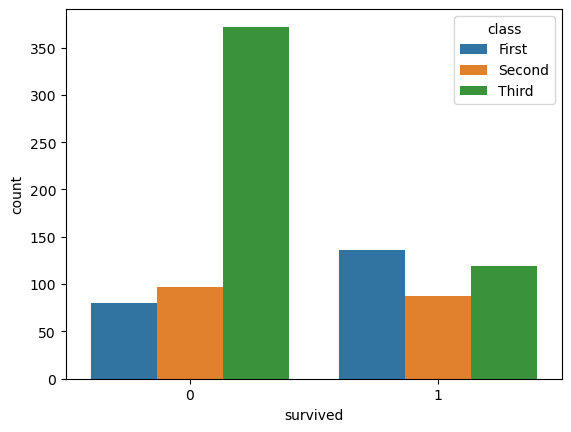

In [71]:
sns.countplot(x='survived',hue='class',data=df)


In [72]:
x = pd.crosstab(df['survived'],df['class'])

In [73]:
x

class,First,Second,Third
survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='class', ylabel='survived'>

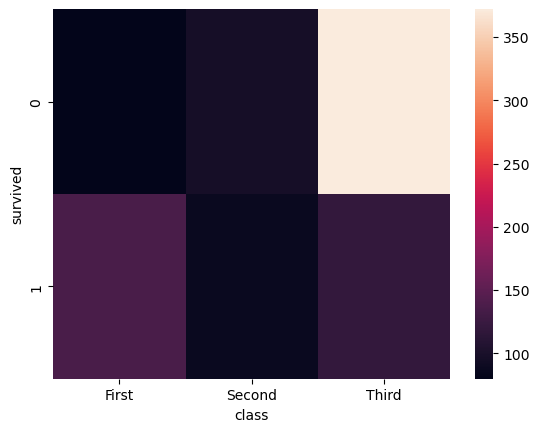

In [74]:
sns.heatmap(x)

<Axes: xlabel='class', ylabel='survived'>

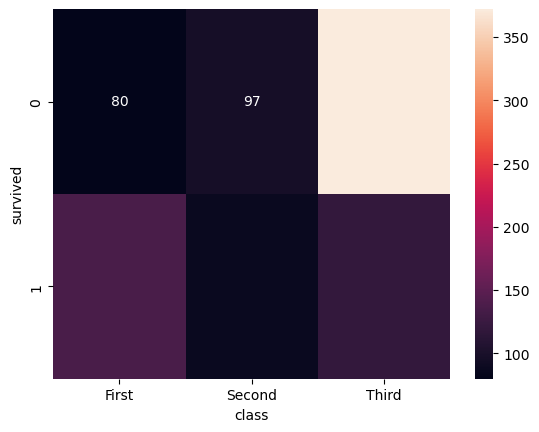

In [75]:
sns.heatmap(x,annot=True)


c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='class', ylabel='age'>

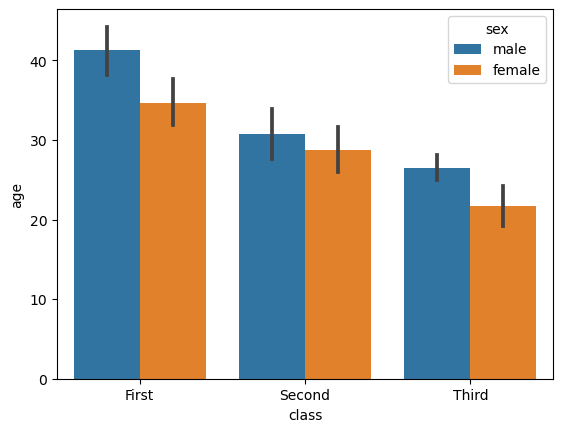

In [76]:
sns.barplot(x='class',y='age',hue='sex',data=df)

c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='class', ylabel='age'>

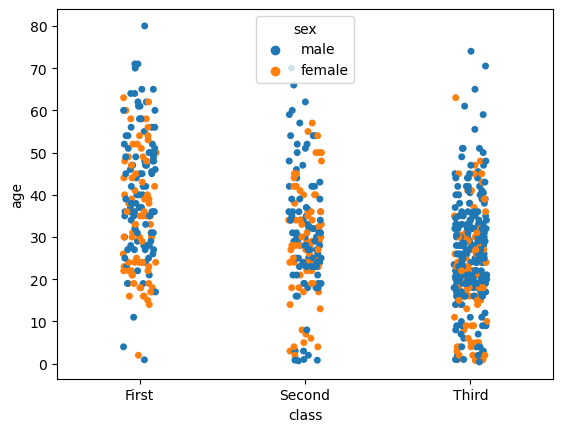

In [77]:
sns.stripplot(x='class',y='age',hue='sex',data=df)


In [78]:
df2 = sns.load_dataset('iris')

In [79]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: >

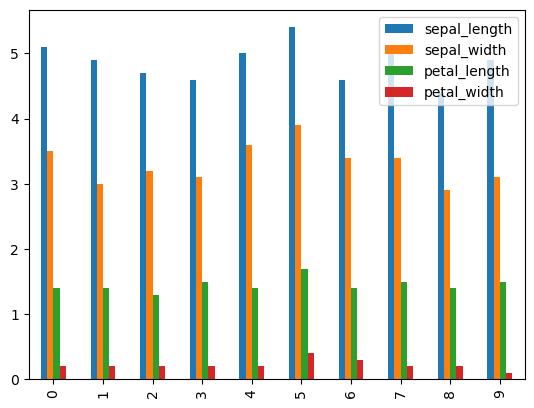

In [81]:
df2.head(10).plot(kind="bar")

<Axes: >

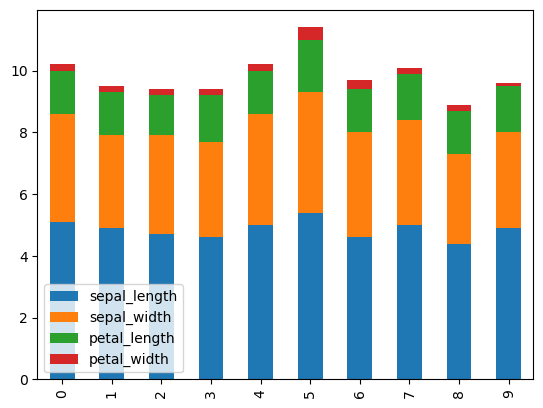

In [82]:
df2.head(10).plot(kind="bar",stacked="True")


c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

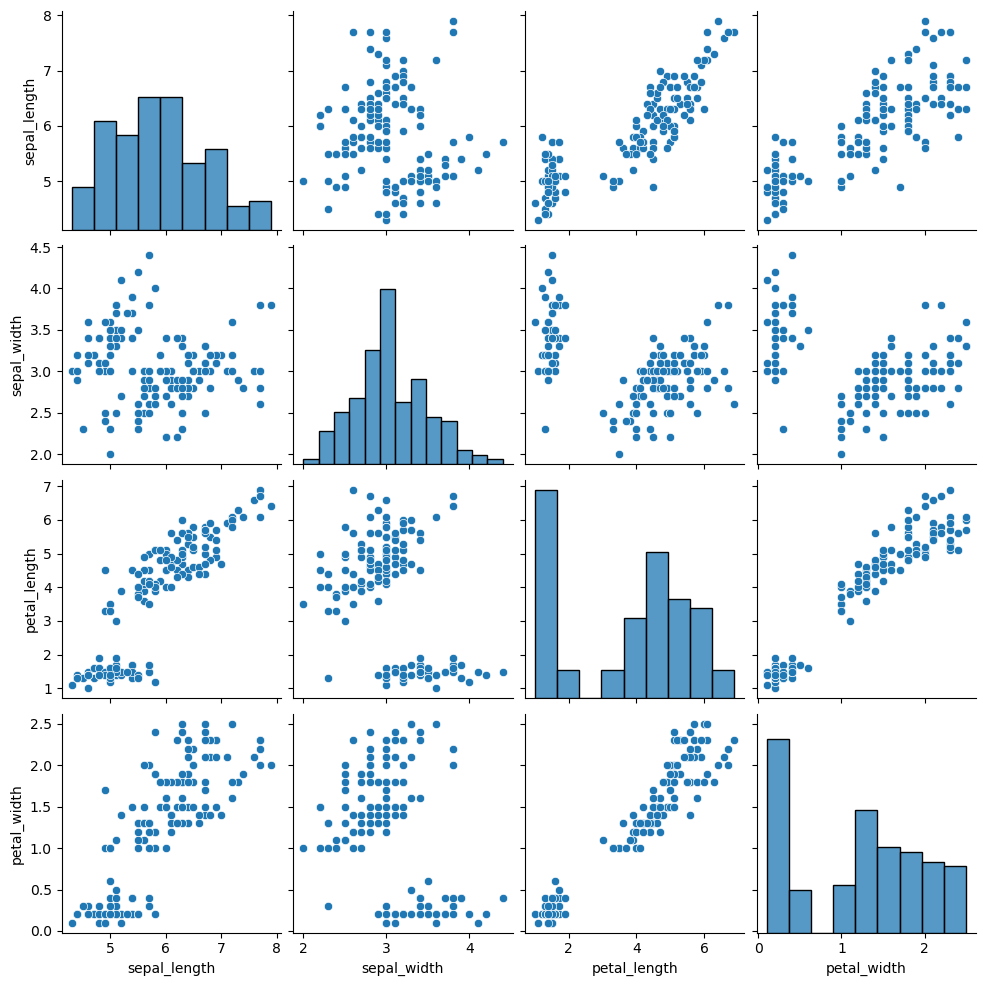

In [83]:
sns.pairplot(df2)

# Bivariate Visualization(Numerical)


In [84]:
df = sns.load_dataset('titanic')

In [85]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Scatter plot

<Axes: xlabel='age', ylabel='fare'>

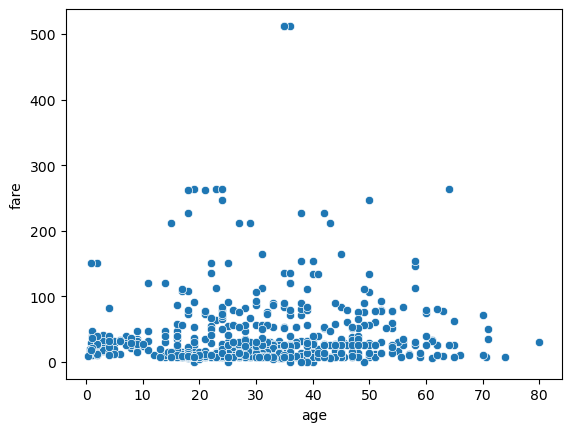

In [88]:
sns.scatterplot(x='age',y='fare',data=df)

<Axes: xlabel='age', ylabel='fare'>

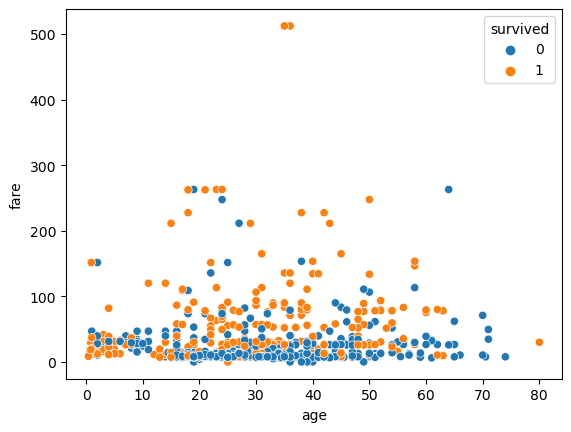

In [89]:
sns.scatterplot(x='age',y='fare',hue='survived',data=df)


In [90]:
df3 = sns.load_dataset('tips')
df3.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

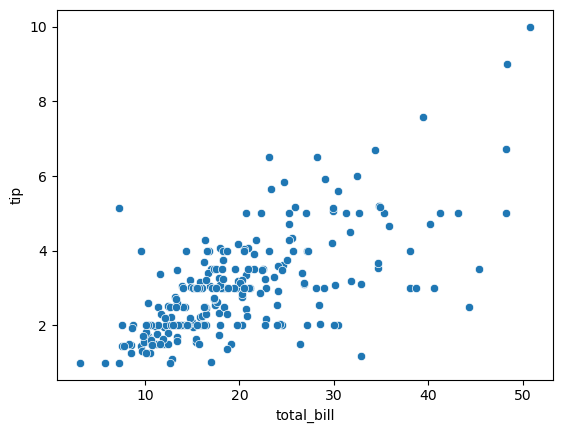

In [92]:
sns.scatterplot(x='total_bill',y='tip',data = df3)

<Axes: xlabel='total_bill', ylabel='tip'>

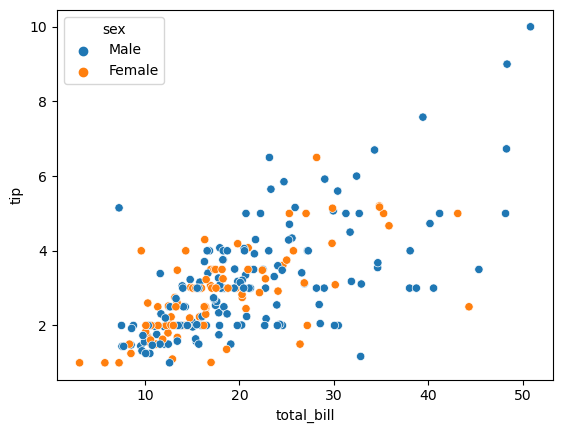

In [93]:
sns.scatterplot(x='total_bill',y='tip',hue='sex',data = df3)


<Axes: xlabel='total_bill', ylabel='tip'>

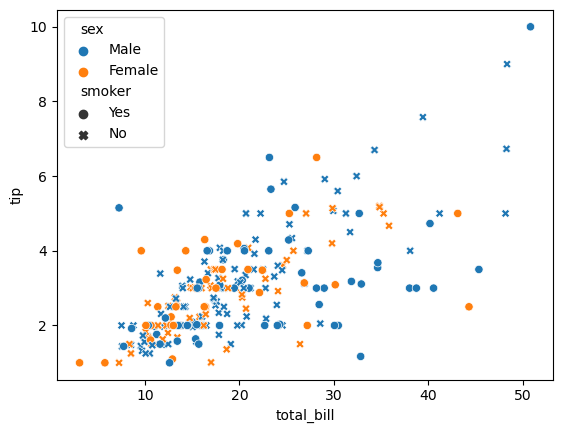

In [94]:
sns.scatterplot(x='total_bill',y='tip',hue='sex',style='smoker',data = df3)


### JointPlot

c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


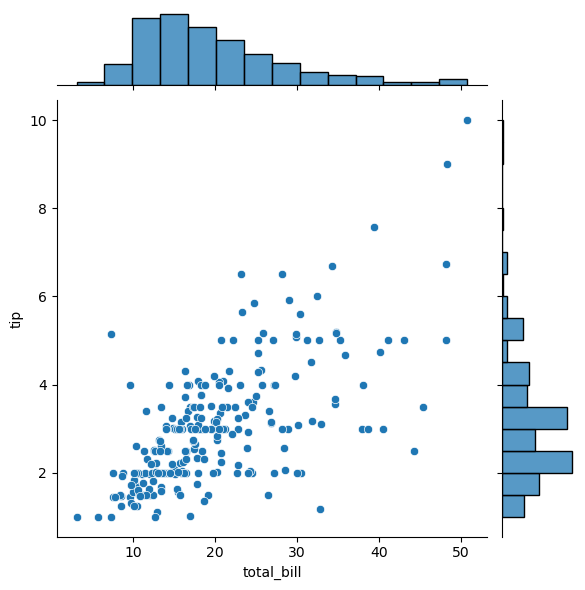

In [95]:
sns.jointplot(x='total_bill',y='tip',data = df3)


c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and 

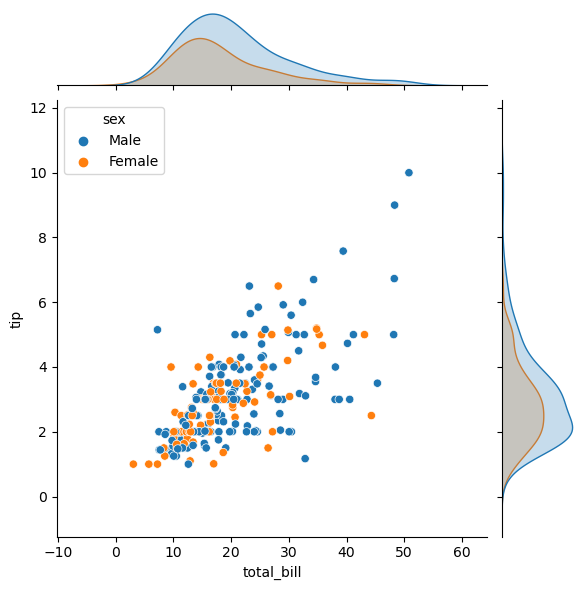

In [96]:
sns.jointplot(x='total_bill',y='tip',hue='sex',data = df3)


c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


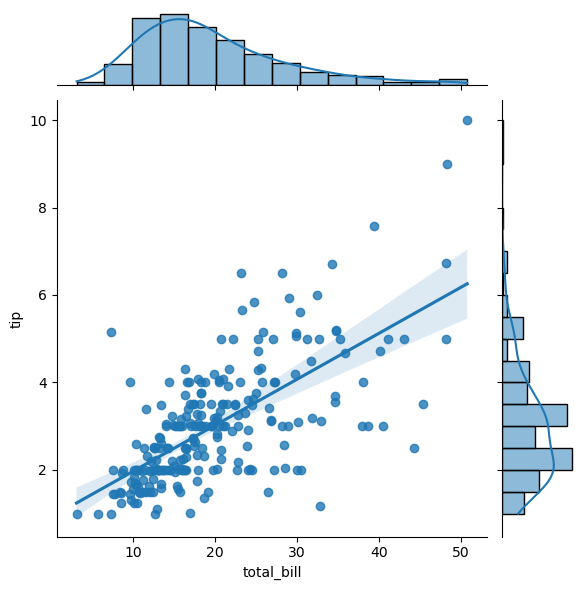

In [97]:
sns.jointplot(x='total_bill',y='tip',data = df3,kind='reg')


In [100]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [101]:
df = sns.load_dataset('dowjones')
df.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


In [102]:
df.corr()

,Date,Price
Date,1.000000,0.826354
Price,0.826354,1.000000


### line plot

c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Price'>

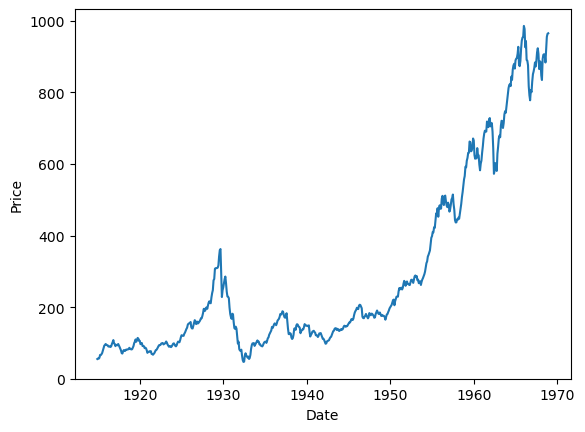

In [103]:
sns.lineplot(x = 'Date',y = 'Price',data=df)

In [104]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [105]:
df.head()

,Date,Price,Month,Year
0,1914-12-01,55.00,12,1914
1,1915-01-01,56.55,1,1915
2,1915-02-01,56.00,2,1915
3,1915-03-01,58.30,3,1915
4,1915-04-01,66.45,4,1915


c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Price'>

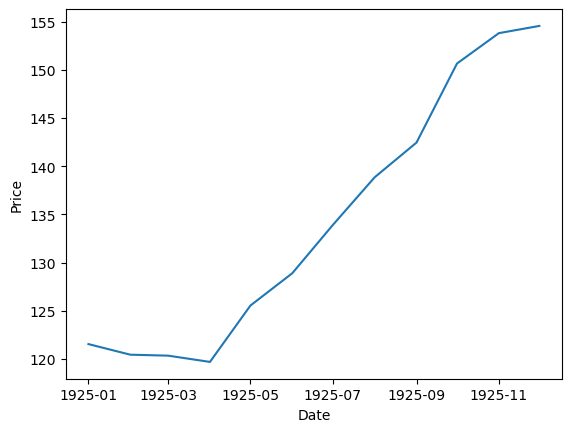

In [106]:
sns.lineplot(x = 'Date',y = 'Price',data=df[df['Year']==1925])
